In [1]:
# mode = int(input('mode:'))     #Считываем номер преобразования. 

### Работа с изображением:

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

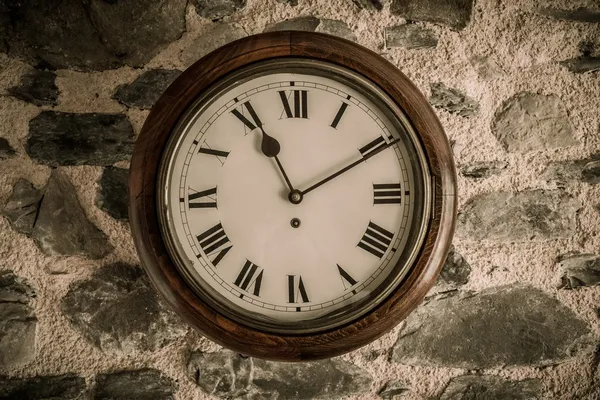

In [3]:
img = Image.open("clock.jpg") # загружаем картинку
img

In [4]:
width = img.size[0]           #Определяем ширину. 
height = img.size[1]          #Определяем высоту. 

print("ширина:",width,"высота:",height)

ширина: 600 высота: 400


Функция для вывода картинки на экран:

In [5]:
def show(img,title=None):  # для вывода черно-белой картинки
    plt.figure(figsize = (6,6))
    plt.imshow(img,  cmap="gray")
    
    if title is not None:
        plt.title(title)
        
    plt.axis("off")
    
    
def show_or(img,title=None):  # для вывода цветной картинки
    plt.figure(figsize = (6,6))
    plt.imshow(img)
    
    if title is not None:
        plt.title(title)
        
    plt.axis("off")

### Перевод изображения в чб различными способами:

Функция перехода к черно-белому изображению:
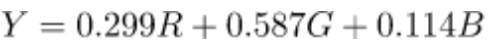

In [6]:
def to_bw(img):
    return img.convert(mode = 'L')


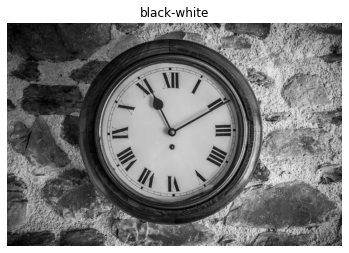

In [7]:
show(to_bw(img),'black-white')


In [8]:
#img_arr = np.asarray(img)  # преобразовали картинку в массив
# im = Image.fromarray(A)  # из массива в картинку

In [9]:
#pip install opencv-python
import cv2 as cv
print( cv.__version__ )

4.6.0


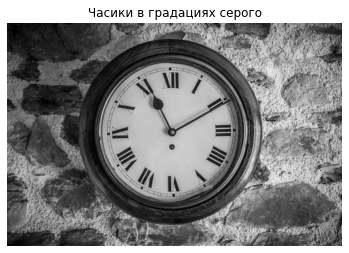

In [10]:
# первеод в градации серого с помощью встроенной функции библиотеки cv
img_grey = cv.imread('clock.jpg', cv.IMREAD_GRAYSCALE) # сразу читаем изображение как чб
show(img_grey,'Часики в градациях серого')


Более подробно о приведенных ниже примерах можно почитать: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

Различные варианты преобразований в чб по пороговому значению:
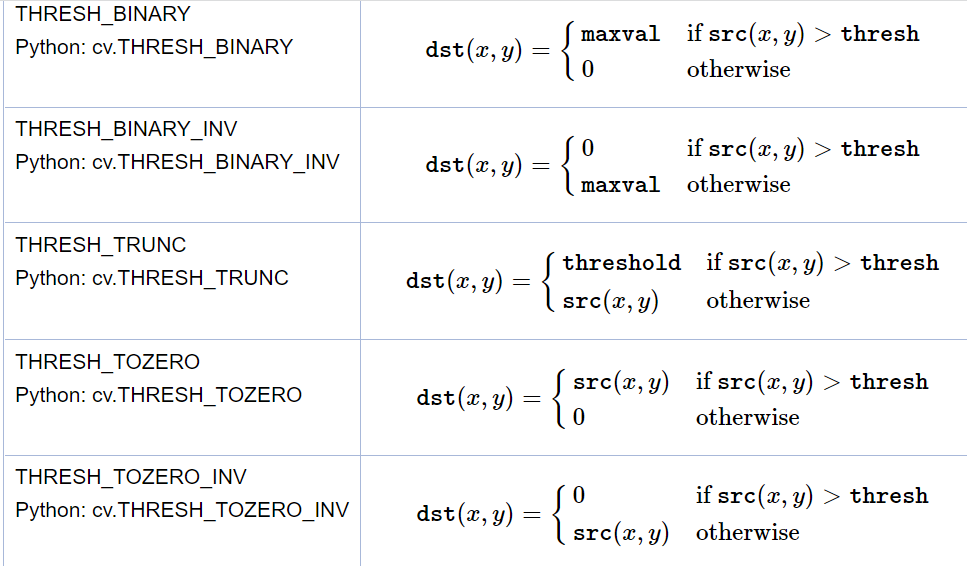

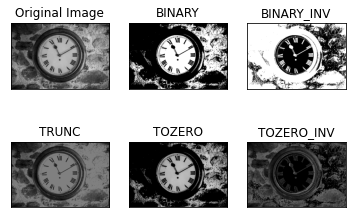

In [11]:
img = cv.imread('clock.jpg',0)
thresh = 128 # пороговое значение

ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Выделение контуров на изображении:
* оригинальное изображение
* cv.THRESH_BINARY - бинарное
* cv.ADAPTIVE_THRESH_MEAN_C - пороговое значение представляет собой среднее значение площади окрестности минус константа C 
* cv.ADAPTIVE_THRESH_GAUSSIAN_C - пороговое значение представляет собой взвешенную по Гауссу сумму значений окрестности минус константа C

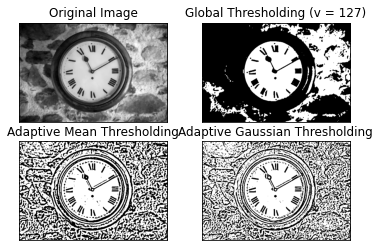

In [12]:
img = cv.imread('clock.jpg',0)
img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Бинаризация Оцу - более умный автоматический выбор порога для бинаризации изображения:

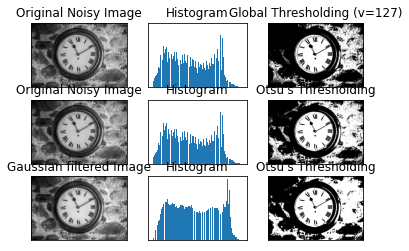

In [13]:
img = cv.imread('clock.jpg',0)

ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY) # сами задаем порог равный 127

ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) # пороговое значение по Оцу

blur = cv.GaussianBlur(img,(5,5),0) # пороговое значение Оцу после фильтрации по Гауссу (те размытия)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)


images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

### Поиск контуров изображения:
Материал взят: https://habr.com/ru/post/676838/

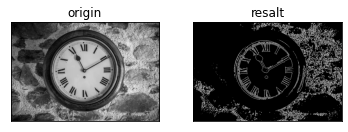

In [14]:
image = cv.imread('clock.jpg')
img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) # преобразовать изображение в формат оттенков серого

ret, thresh = cv.threshold(img_gray, 150, 255, cv.THRESH_BINARY) # переводим в бинарное изображение по порогу(150)

# обнаруживаем контуры на двоичном изображении с помощью cv.CHAIN_APPROX_NONE
contours, hierarchy = cv.findContours(image=thresh, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)
 
#create an empty image for contours
img_contours = np.uint8(np.zeros((img_gray.shape[0],img_gray.shape[1])))

cv.drawContours(img_contours, contours, -1, (255,255,255), 1)

images = [img_gray, img_contours]
titles = ['origin','resalt' ]

for i in range(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


Text(0.5, 1.0, 'res')

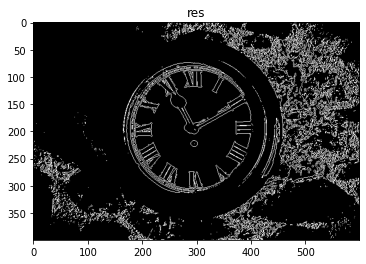

In [15]:
#более крупно выводим результат
plt.imshow(img_contours, 'gray' ) # выводим итоговое изображение в окно
plt.title('res')

#cv.imwrite('C:\PRJ\PYTHON\image_processing\clock_border.jpeg', img_contours) # сохраняем изображение в файлы

##### Поиск контуров состоящих из n прямых (?)
Источник: https://vc.ru/dev/286152-poisk-obektov-cherez-opredelenie-ih-konturov-sredstvami-opencv

Text(0.5, 1.0, 'res')

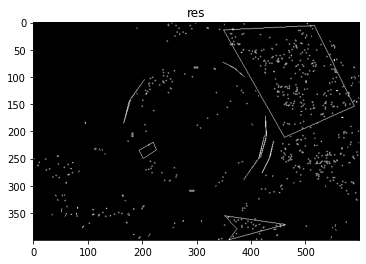

In [16]:
img_area = np.uint8(np.zeros((img_gray.shape[0],img_gray.shape[1])))

for cont in contours:
    #сглаживание и определение количества углов
    sm = cv.arcLength(cont, True)
    apd = cv.approxPolyDP(cont, 0.02*sm, True)
    #выделение контуров
    if len(apd) == 4:
        cv.drawContours(img_area, [apd], -1, (255,255,255), 1)

# при длине контура 1 - получаем мелкий шум
# при длине контура 2-3 - часть циферблата
# при длине контура 4 - контур поймал весь шум сбоку

plt.imshow(img_area, 'gray' ) # выводим итоговое изображение в окно
plt.title('res')


##### Поиск окружностей на изображении с помощью cv.MinEnclosingCircle():
Источник: https://robocraft.ru/computervision/640

Text(0.5, 1.0, 'res')

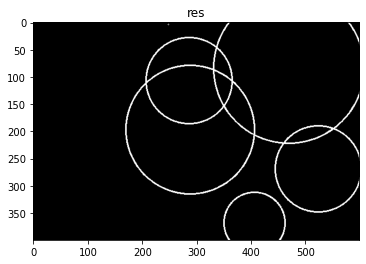

In [17]:
# Идея: все контуры по очереди заключаем в окружности
img_round = np.uint8(np.zeros((img_gray.shape[0],img_gray.shape[1])))

radius_store = [] # храним все радиусы
center_store = [] # храним все центры окружностей


for cont in contours:
    (x,y),radius = cv.minEnclosingCircle(cont) # находим окружности 
    center = (int(x),int(y))
    radius = int(radius)
    radius_store.append(radius)
    center_store.append(center)
    #cv.circle(img_round, center, radius, (255,255,255), 2) # 2 - толщина контура
    #cv.drawContours(img_round, [apd], -1, (255,255,255), 1)


for i in range(5): # выводим 5 кругов с самым большим радиусом
    
    r = max(radius_store) # максимальный радиус
    ind = radius_store.index(r) # его индекс
     
    cv.circle(img_round, center_store[ind], r, (255,255,255), 2) # 2 - толщина контура
    cv.drawContours(img_round, [apd], -1, (255,255,255), 1)
    
    radius_store.pop(ind)
    center_store.pop(ind)
    

plt.imshow(img_round, 'gray' ) # выводим итоговое изображение в окно
plt.title('res')


#### Обнаружение прямых на изображении
Источник: https://russianblogs.com/article/54651126203/
* обнаружение границ с помощью cv.Canny -- https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html
* обнаружение прямых с помощью cv.HoughLines - не работает
* обнаружение прямых с помощью cv.HoughLinesP - работает, явл улучшением предыдущего
* документация для последних двух -- https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html

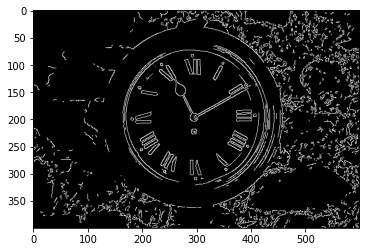

In [18]:
img_grey = cv.imread('clock.jpg', cv.IMREAD_GRAYSCALE) # сразу читаем изображение как чб

# алгоритм обнаружения границ 
edges = cv.Canny(img_grey, threshold1=250, threshold2=400) 

plt.imshow(edges, 'gray' ) # выводим итоговое изображение в окно


Text(0.5, 1.0, 'res')

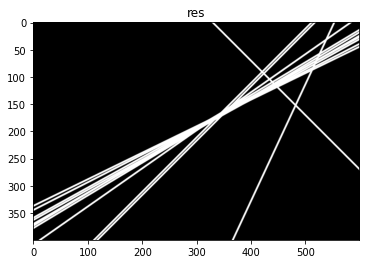

In [19]:
img_line = np.uint8(np.zeros((img_gray.shape[0],img_gray.shape[1])))

# Функция HoughLines ()
#lines = cv.HoughLines(edges, rho = 1, theta = 1 * np.pi/180, threshold=120, srn=0, stn = 0, min_theta=1, max_theta=2)
lines = cv.HoughLines(edges, 1, np.pi / 180, 100, None, 0, 0)

#for i in range(0, len(lines)):
if lines is not None:
    for i in range(0, len(lines)):
        rho, theta = lines[i][0][0], lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
       #cv.line(img_line, (x1, y1), (x2, y2), (255, 255, 255), 2)
        cv.line(img_line,(x1, y1), (x2, y2), (255,255,255), 2, cv.LINE_AA)

plt.imshow(img_line, 'gray' ) # выводим итоговое изображение в окно
plt.title('res')

Text(0.5, 1.0, 'res')

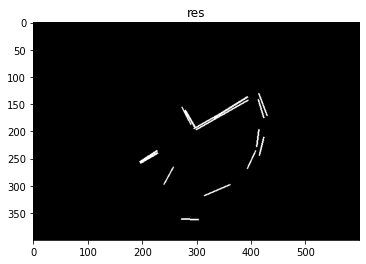

In [20]:
img_line_2 = np.uint8(np.zeros((img_gray.shape[0],img_gray.shape[1])))

# Функция HoughLinesP ()
lines_p = cv.HoughLinesP(edges, rho = 1, theta = np.pi/180, threshold = 50, minLineLength= 31, maxLineGap=3)
# minLineLength - минимальная длина найденных линий
# maxLineGap=5 - максимальный зазор между точками линии

for i in range(len(lines_p)):
    x_1, y_1, x_2, y_2 = lines_p[i][0]
    cv.line(img_line_2, (x_1, y_1), (x_2, y_2), (255, 255, 255), 2)

plt.imshow(img_line_2, 'gray' ) # выводим итоговое изображение в окно
plt.title('res')

### Удаление шума с изображения
Источники: https://habr.com/ru/post/651989/

1. С помощью размытия

Text(0.5, 1.0, 'blur')

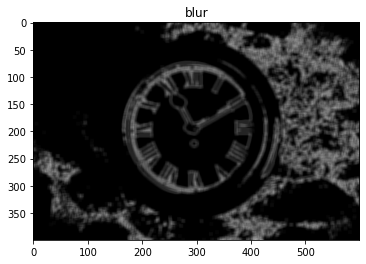

In [21]:

my_photo = cv.imread('clock_border.jpeg') # читаем контурное изображение

average_image = cv.blur(my_photo,(7,7))
plt.imshow(average_image, 'gray' ) 
plt.title('blur')

2. Применение Гауссовского фильтра

Text(0.5, 1.0, 'gaussian')

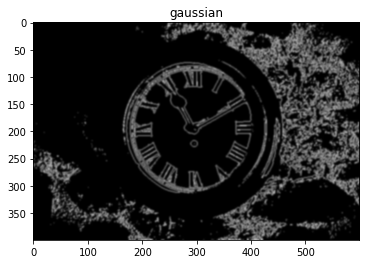

In [23]:
my_photo = cv.imread('clock_border.jpeg') # читаем контурное изображение

gaussian_image  = cv.GaussianBlur(my_photo,(7,7),0)
plt.imshow(gaussian_image, 'gray' ) 
plt.title('gaussian')
